#Question 1
I have captured a video from my mobile device with 30 frames per second and i am just storing the one image per second

In [37]:
import cv2 as cv
vidcap = cv.VideoCapture(r'E:\GSU\CV\Assignment_2\vid1.mp4')
check,image = vidcap.read()
count = 0
inc=0
while check:
    check,image = vidcap.read()
    if count%30==0 : #As i have taken a video in 30fps so i am storing one image from each frame.
      inc+=1
      cv.imwrite(r"E:\GSU\CV\Assignment_2\data\frame%d.jpg" % inc, image)         
    count += 1

Ques-1-A) As given that to demostrate the usage of canny edge detection

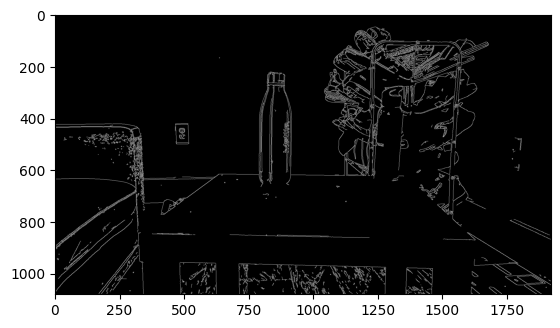

In [38]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'E:\GSU\CV\Assignment_2\data\frame1.jpg',0)
edges = cv.Canny(img,100,200)
plt.imshow(edges,cmap='gray')

Here I have cropped the water bottle object in an image and applied canny edge detection.

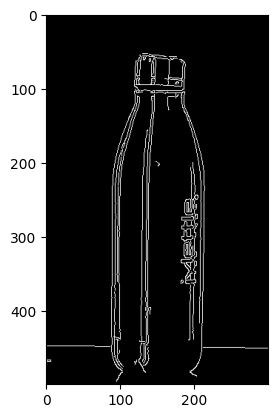

In [39]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'E:\GSU\CV\Assignment_2\data\frame1.jpg',0)
img1=img[170:670,700:1000]
edges = cv.Canny(img1,100,200)
plt.imshow(edges,cmap='gray')

Canny edge detection without any using inbuilt function


As first step is to smooth the image for which i am using gaussian kernel of 5*5 size

In [40]:
import numpy as np
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

So, as to find the edges we need to calculate it's gradient for which i am using a sobel filter


In [41]:
from scipy import ndimage
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Ix = ndimage.convolve(img, Kx)
    Iy = ndimage.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [42]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [43]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

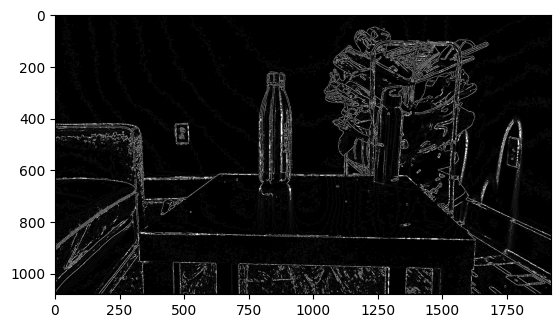

In [44]:
import matplotlib.pyplot as plt
import cv2 as cv
frame = cv.imread(r'E:\GSU\CV\Assignment_2\data\frame1.jpg',0)
g=gaussian_kernel(5,5)
weak_th = None 
strong_th = None    
img= cv.filter2D(src=frame, kernel=g, ddepth=19)
mag,ang=sobel_filters(img)
mag_max = np.max(mag)
c=non_max_suppression(mag,ang)
a,b,d=threshold(c)       
plt.imshow(a,cmap='gray')

1A) Corner detection

Using Harris Corner Detection

In [45]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
filename = r'E:\GSU\CV\Assignment_2\data\frame1.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.07)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
#cv.imshow('dst',img)
disp = cv.resize(img, (540, 380), fx = 0, fy = 0,
						interpolation = cv.INTER_CUBIC)
cv.imwrite(r'E:\GSU\CV\Assignment_2\data\corners_harris.jpg',img)


True

Ques-1B) finding the coressponding points between 2 images

In [46]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread(r'E:\GSU\CV\Assignment_2\data\frame1.jpg',0)  
img2 = cv2.imread(r'E:\GSU\CV\Assignment_2\data\frame3.jpg',0)
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [48]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Homography Matrix")
    print(M)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Homography Matrix
[[ 9.03018409e-01 -5.29460275e-03  1.08345634e+02]
 [-2.05896638e-02  9.52389132e-01  4.46820056e+01]
 [-3.16115542e-05 -6.14543362e-06  1.00000000e+00]]


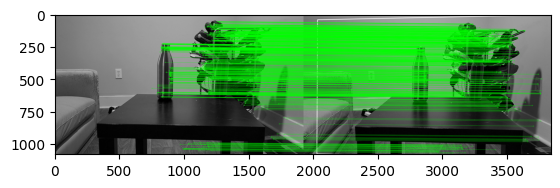

In [49]:
draw_params = dict(matchColor = (0,255,0), 
                   singlePointColor = None,
                   matchesMask = matchesMask, 
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv.imwrite(r'E:\GSU\CV\Assignment_2\data\matching_between_2_frames.jpg',img3)
plt.imshow(img3, 'gray')
#plt.show()

Que-2) Image Stiching


In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [51]:
import cv2
def pan_stich(image_paths,output_loc):

    #image_paths=[r'E:\GSU\CV\Assignment_2\pics\classroom_south2.jpg',r'E:\GSU\CV\Assignment_2\pics\classroom_south3.jpg',r'E:\GSU\CV\Assignment_2\pics\classroom_south4.jpg']
    # initialized a list of images
    imgs = []

    for i in range(len(image_paths)):
        imgs.append(cv2.imread(image_paths[i]))
        imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)

    stitchy=cv2.Stitcher.create()
    (dummy,output)=stitchy.stitch(imgs)

    if dummy != cv2.STITCHER_OK:
        print("stitching ain't successful")
    else:
        print('Your Panorama is ready!!!')

    # final output
    cv2.imwrite(output_loc+'\out.jpg',output)



In [52]:
loc=r'E:\GSU\CV\Assignment_2\pics\library_north'
image_paths=[loc+'\LibraryNorth_team06_1.jpeg',loc+'\LibraryNorth_team06_2.jpeg',loc+'\LibraryNorth_team06_3.jpeg']
image_dest=r'E:\GSU\CV\Assignment_2\pics\library_north'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [53]:
loc=r'E:\GSU\CV\Assignment_2\pics\urban_life'
image_paths=[loc+r'\urbanlife1.jpg',loc+r'\urbanlife2.jpg',loc+r'\urbanlife3.jpg']
image_dest=r'E:\GSU\CV\Assignment_2\pics\urban_life'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [54]:
loc=r'E:\GSU\CV\Assignment_2\pics\student_center'
image_paths=[loc+r'\team3_Studentcenter_1.jpeg',loc+r'\team3_Studentcenter_2.jpeg',loc+r'\team3_Studentcenter_3.jpeg']
image_dest=r'E:\GSU\CV\Assignment_2\pics\student_center'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [55]:
loc=r'E:\GSU\CV\Assignment_2\pics\Tdeck'
image_paths=[loc+r'\TDeck_team06_1.jpeg',loc+r'\TDeck_team06_2.jpeg',loc+r'\TDeck_team06_3.jpeg']
image_dest=r'E:\GSU\CV\Assignment_2\pics\Tdeck'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [56]:
loc=r'E:\GSU\CV\Assignment_2\pics\Science_center'
image_paths=[loc+r'\sciencecenter1.jpg',loc+r'\sciencecenter2.jpg',loc+r'\sciencecenter3.jpg']
image_dest=r'E:\GSU\CV\Assignment_2\pics\Science_center'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


Question-3

In [57]:
import cv2
import depthai as dai
import numpy as np
from copy import deepcopy

In [58]:
img = cv2.imread(r'E:\GSU\CV\Assignment_2\data\frame1.jpg')
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialising to 0
intergal_img = [[0 for j in range(len(img_bw[0]))] for i in range(len(img_bw))]

# compying values form img array
for i in range(len(img_bw)):
    for j in range(len(img_bw[0])):
        intergal_img[i][j] = int(img_bw[i][j])

# calculating the integral img
for i in range(1, len(img_bw[0])):
    intergal_img[0][i] += intergal_img[0][i-1] 

for j in range(1, len(img_bw)):
    intergal_img[j][0] += intergal_img[j-1][0]
    
for i in range(1, len(img_bw)):
    for j in range(1, len(img_bw[0])):
        intergal_img[i][j] = intergal_img[i-1][j] + intergal_img[i][j-1] - intergal_img[i-1][j-1] + img_bw[i][j]
        

In [59]:
a = np.array(intergal_img)
mat = np.matrix(a)

with open(r'E:\GSU\CV\Assignment_2\data\integral_matrix.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt="%d")

Question 4-5) 

In [60]:
import cv2
import numpy as np
import sys

class Image_Stitching():
    def __init__(self, feature) :
        self.ratio=0.85
        self.min_match=10
        if feature=='sift':
            
            self.feature=cv2.xfeatures2d.SIFT_create()
        else:
            self.feature=cv2.ORB_create()
        self.smoothing_window_size=800

    def registration(self,img1,img2):
        kp1, des1 = self.feature.detectAndCompute(img1, None)
        kp2, des2 = self.feature.detectAndCompute(img2, None)
        matcher = cv2.BFMatcher()
        raw_matches = matcher.knnMatch(des1, des2, k=2)
        good_points = []
        good_matches=[]
        for m1, m2 in raw_matches:
            if m1.distance < self.ratio * m2.distance:
                good_points.append((m1.trainIdx, m1.queryIdx))
                good_matches.append([m1])
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
        #cv2.imwrite('matching.jpg', img3)
        if len(good_points) > self.min_match:
            image1_kp = np.float32(
                [kp1[i].pt for (_, i) in good_points])
            image2_kp = np.float32(
                [kp2[i].pt for (i, _) in good_points])
            H, status = cv2.findHomography(image2_kp, image1_kp, cv2.RANSAC,5.0)
        return H

    def create_mask(self,img1,img2,version):
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2
        offset = int(self.smoothing_window_size / 2)
        barrier = img1.shape[1] - int(self.smoothing_window_size / 2)
        mask = np.zeros((height_panorama, width_panorama))
        if version== 'left_image':
            mask[:, barrier - offset:barrier + offset ] = np.tile(np.linspace(1, 0, 2 * offset ).T, (height_panorama, 1))
            mask[:, :barrier - offset] = 1
        else:
            mask[:, barrier - offset :barrier + offset ] = np.tile(np.linspace(0, 1, 2 * offset ).T, (height_panorama, 1))
            mask[:, barrier + offset:] = 1
        return cv2.merge([mask, mask, mask])

    def blending(self,img1,img2):
        H = self.registration(img1,img2)
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2

        panorama1 = np.zeros((height_panorama, width_panorama, 3))
        mask1 = self.create_mask(img1,img2,version='left_image')
        panorama1[0:img1.shape[0], 0:img1.shape[1], :] = img1
        panorama1 *= mask1
        mask2 = self.create_mask(img1,img2,version='right_image')
        panorama2 = cv2.warpPerspective(img2, H, (width_panorama, height_panorama))*mask2
        result=panorama1+panorama2

        rows, cols = np.where(result[:, :, 0] != 0)
        min_row, max_row = min(rows), max(rows) + 1
        min_col, max_col = min(cols), max(cols) + 1
        final_result = result[min_row:max_row, min_col:max_col, :]
        return final_result



Using SIFT Features

In [61]:
img1 = cv2.imread(r'E:\GSU\CV\Assignment_2\pics\Tdeck\TDeck_team06_1.jpeg')
img2 = cv2.imread(r'E:\GSU\CV\Assignment_2\pics\Tdeck\TDeck_team06_3.jpeg')
final=Image_Stitching('sift').blending(img1,img2)
cv2.imwrite(r'E:\GSU\CV\Assignment_2\pics\Tdeck\TDeck_out_sift.jpeg', final)

True

Using ORB Feature

In [62]:
img1 = cv2.imread(r'E:\GSU\CV\Assignment_2\pics\Tdeck\TDeck_team06_1.jpeg')
img2 = cv2.imread(r'E:\GSU\CV\Assignment_2\pics\Tdeck\TDeck_team06_3.jpeg')
final=Image_Stitching('orb').blending(img1,img2)
cv2.imwrite(r'E:\GSU\CV\Assignment_2\pics\Tdeck\TDeck_out_orb.jpeg', final)

True